In [1]:
import matplotlib.pyplot as plt
from mlblocks import MLPipeline

from orion.data import load_signal, load_anomalies

In [2]:
signal = 'S-1'

timeseries = load_signal(signal)
anomalies = load_anomalies(signal)

In [3]:
timeseries['label'] = [0] * len(timeseries)
timeseries = timeseries.set_index('timestamp').sort_index()
for i, anomaly in anomalies.iterrows():
    timeseries.at[anomaly.start: anomaly.end, 'label'] = 1
    
timeseries = timeseries.reset_index()

In [4]:
timeseries.head()

,timestamp,value,label
0,1222819200,-0.366359,0
1,1222840800,-0.394108,0
2,1222862400,0.403625,0
3,1222884000,-0.362759,0
4,1222905600,-0.370746,0


In [5]:
pipeline = MLPipeline("lstm_supervised")

pipeline.fit(timeseries)

anomalies = pipeline.predict(timeseries)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



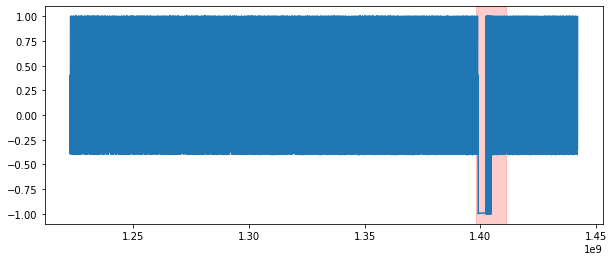

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(timeseries['timestamp'], timeseries['value'])

for anomaly in anomalies:
    plt.axvspan(anomaly[0], anomaly[1], color='red', alpha=0.2)